<a href="https://colab.research.google.com/github/FAYIZNM/nlp-text-classification/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd


uploaded = files.upload()


our_data = pd.read_csv("DATASET Full-Economic-News-DFE-839861.csv")


print(our_data.shape)
print(our_data.columns)

Saving DATASET Full-Economic-News-DFE-839861.csv to DATASET Full-Economic-News-DFE-839861.csv
(8000, 15)
Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'positivity', 'positivity:confidence', 'relevance',
       'relevance:confidence', 'articleid', 'date', 'headline',
       'positivity_gold', 'relevance_gold', 'text'],
      dtype='object')


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("Unique values in 'relevance' column:", our_data['relevance'].unique())

X = our_data['text']
y = our_data['relevance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_settings = [40000, 5000, 1000]
results = []

for max_feat in feature_settings:
    vectorizer = CountVectorizer(max_features=max_feat, stop_words="english")
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    model = LinearSVC()
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)

    results.append({
        "max_features": max_feat,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4)
    })

results_df = pd.DataFrame(results)
print("\nLinear SVM Results:")
print(results_df.to_string(index=False))

Unique values in 'relevance' column: ['yes' 'no' 'not sure']


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Linear SVM Results:
 max_features  Accuracy  Precision  Recall  F1 Score
        40000    0.7444     0.7435  0.7444    0.7439
         5000    0.7388     0.7449  0.7388    0.7417
         1000    0.7863     0.7537  0.7863    0.7658



=== Confusion Matrix (Linear SVM, max_features=40000) ===


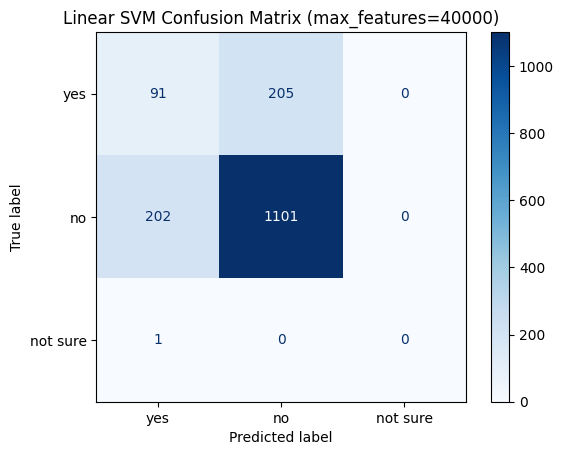


=== Confusion Matrix (Linear SVM, max_features=5000) ===


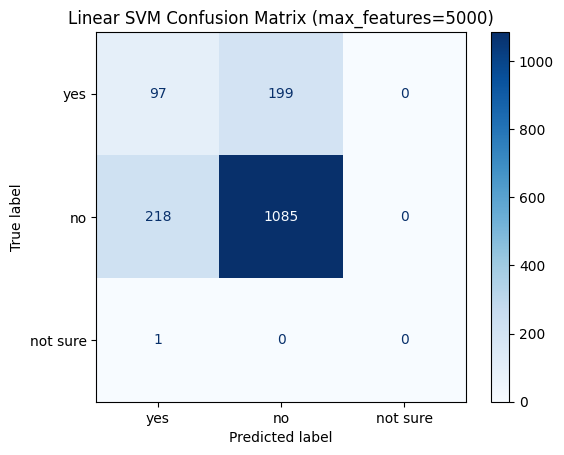


=== Confusion Matrix (Linear SVM, max_features=1000) ===


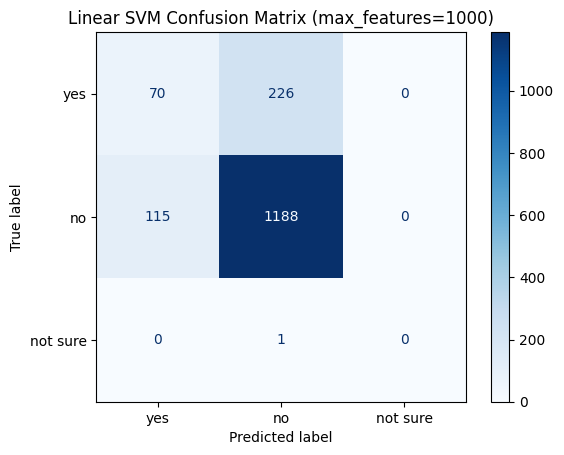

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = ['yes', 'no', 'not sure']  # adjust if dataset labels differ

for max_feat in feature_settings:
    vectorizer = CountVectorizer(max_features=max_feat, stop_words="english")
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    model = LinearSVC(max_iter=5000)  # bump iterations to reduce warnings
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)

    print(f"\n=== Confusion Matrix (Linear SVM, max_features={max_feat}) ===")
    cm = confusion_matrix(y_test, preds, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Linear SVM Confusion Matrix (max_features={max_feat})")
    plt.show()